In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings 
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
pip install sidetable

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



## Importing our clean Data¶

In [3]:
df = pd.read_csv('EDA_Flight_Fare.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,month,year,week_name,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,3897,24,3,2019,Sunday,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,2019,Wednesday,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h 0m,2 stops,13882,9,6,2019,Sunday,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,2019,Sunday,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,2019,Friday,16,50,21,35,4,45


In [4]:
df.describe()

,Price,day,month,year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min
count,10462.000000,10462.000000,10462.000000,10462.0,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,9026.790289,13.463200,4.701491,2019.0,12.478494,24.404989,13.387689,24.719939,10.026190,28.210189
std,4624.849541,8.467493,1.163802,0.0,5.727227,18.815719,6.855547,16.570450,8.378023,16.879185
min,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5224.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8266.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12344.750000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [5]:
df.describe(include = 'O').T

,count,unique,top,freq
Airline,10462,10,Jet Airways,3700
Date_of_Journey,10462,40,2019-06-06,490
Source,10462,5,Delhi,4345
Destination,10462,5,Cochin,4345
Route,10462,128,DEL → BOM → COK,2376
Dep_Time,10462,222,18:55,233
Arrival_Time,10462,223,19:00,590
Duration,10462,368,2h 50m,544
Total_Stops,10462,5,1 stop,5625
week_name,10462,7,Wednesday,2048


## Plots

Text(0.5, 1.0, 'Boxplot of price')

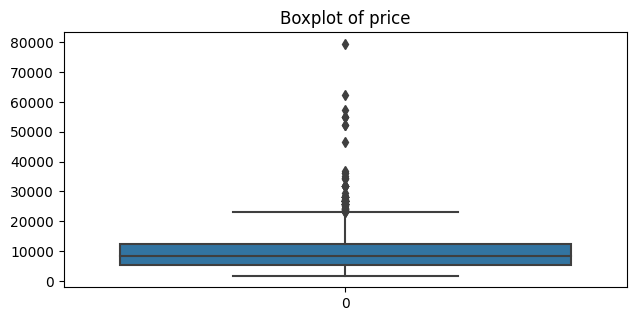

In [6]:
# plt.figure(figsize=(16,55))
# plt.subplot(14,2,1)
# sns.distplot(df['Price'])

plt.figure(figsize=(16,55))
plt.subplot(14,2,2)
sns.boxplot(df['Price'])

plt.title('Boxplot of price')



# Here we can observe that the price column is skewed somewhat toward right, so price is an Right skewed

In [7]:
df['day'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21], dtype=int64)

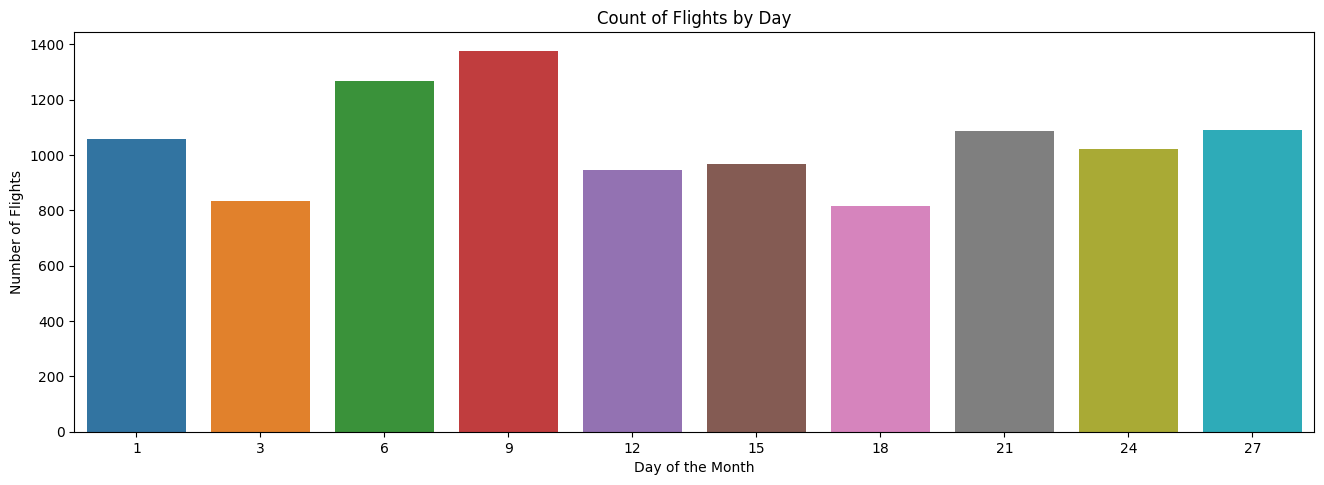

In [8]:
plt.figure(figsize=(16,55))
plt.subplot(9,1,1)
sns.countplot(data=df, x='day')

plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.title('Count of Flights by Day')

plt.show()


# Our observations:

# Most flights are in the date of 9 and 6

In [9]:
df['month'].unique()

array([3, 5, 6, 4], dtype=int64)

Text(0.5, 1.0, 'Count of Flights by Month')

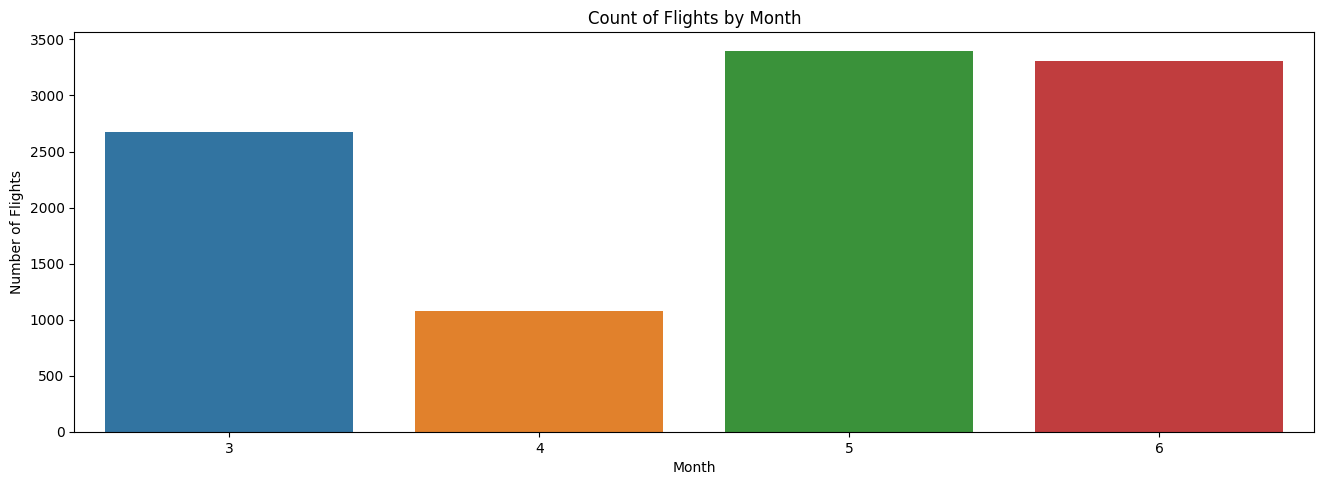

In [10]:
plt.figure(figsize=(16,55))
plt.subplot(9,1,1)
sns.countplot(data=df, x='month')

plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Count of Flights by Month')


# Our observations:

# Most flights are in the date of may and june
# Most flights are in 2nd week of the all months.

In [11]:
df['dep_hour'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3], dtype=int64)

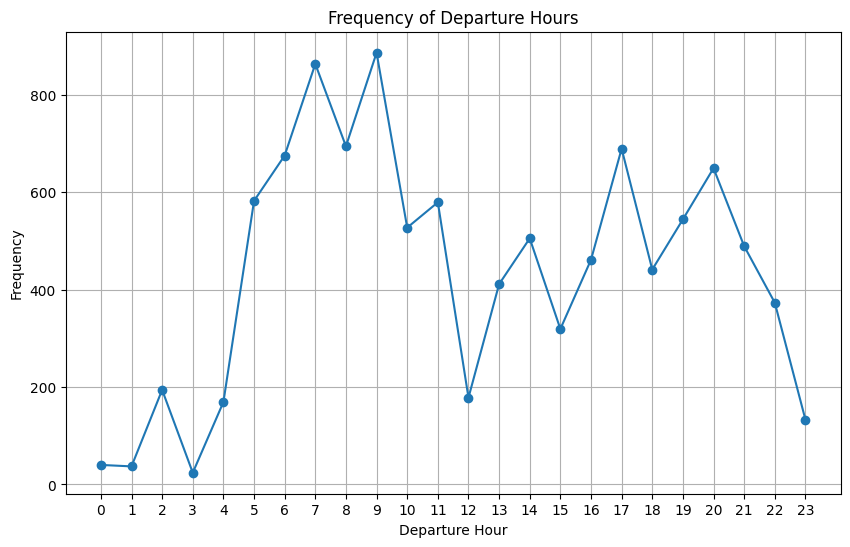

In [12]:
# plt.figure(figsize=(16,55))
# plt.subplot(9,1,1)
# sns.countplot(data=df, x='dep_hour')

# plt.xlabel('Departure Hour')
# plt.ylabel('Number of Flights')
# plt.title('Count of Flights by Departure Hour')

dep_hour_counts = df['dep_hour'].value_counts().sort_index()

# Plotting
dep_hour_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Departure Hour')
plt.ylabel('Frequency')
plt.title('Frequency of Departure Hours')
plt.xticks(dep_hour_counts.index)  # Ensure all hours are labeled
plt.grid(True)
plt.show()


# Our observations:

# Most flights have been departed in 7 AM and 9 AM 

In [13]:
df['arrival_hour'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17], dtype=int64)

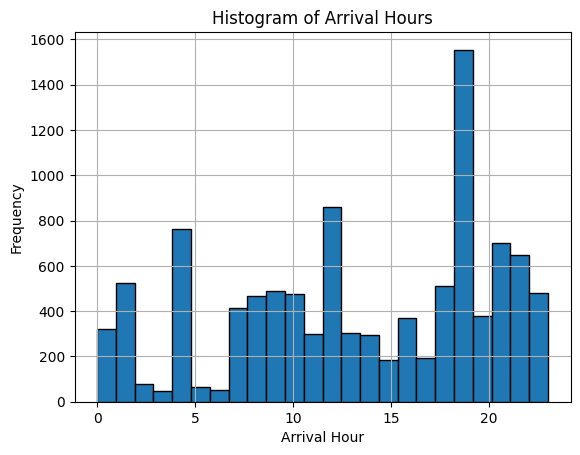

In [14]:
# plt.figure(figsize=(16,55))
# plt.subplot(9,1,1)
# sns.countplot(data=df, x='arrival_hour')

# plt.xlabel('Arrival Hour')
# plt.ylabel('Number of Flights')
# plt.title('Count of Flights by Arrival Hour')

plt.hist(df['arrival_hour'], bins=24, edgecolor='black')  # 'bins=24' for 24 hours in a day
plt.xlabel('Arrival Hour')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Hours')
plt.grid(True)
plt.show()


# Our observations:

# Most flights have been departed in 9 PM followed by 7 PM and  12 PM

# From the Total_Stops column As we seen below most of them are 1 stop and non-stop and in this below figure we 
# can see that 12 and 7 PM landing are highest, so we can infer that people who deptaurted starting from 9 AM or 7 AM 
# have been landed by 12 PM or 7PM and in the below source and destination columns also we have seen that from source 
# Delhi is high and from destination Cochin is high where the average flight time is 3 hrs for non-stop.

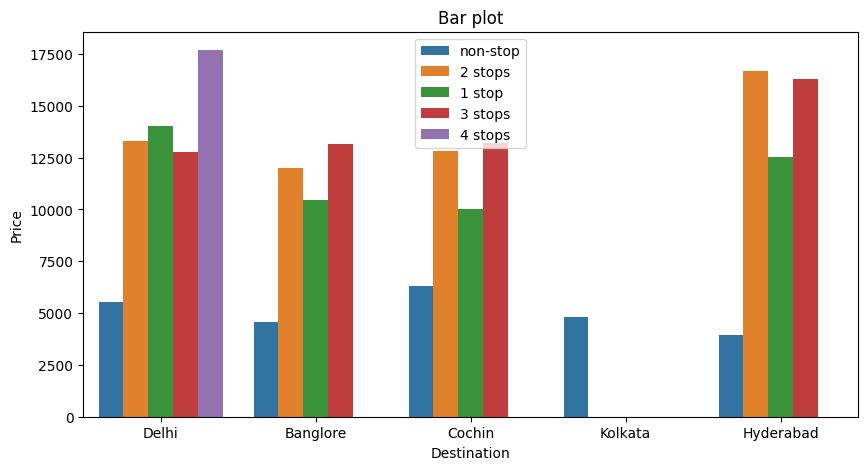

In [15]:
fig=plt.subplots(figsize=(10,5))
sns.barplot(x='Destination',y='Price' , data=df, hue='Total_Stops', ci = None)
plt.title('Bar plot')
plt.legend()
plt.show()

In [17]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [18]:
df.drop(["Airline","Source","Destination",'Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','year','week_name'],axis=1,inplace=True)
df.head()

,Total_Stops,Price,day,month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_min
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


<Axes: >

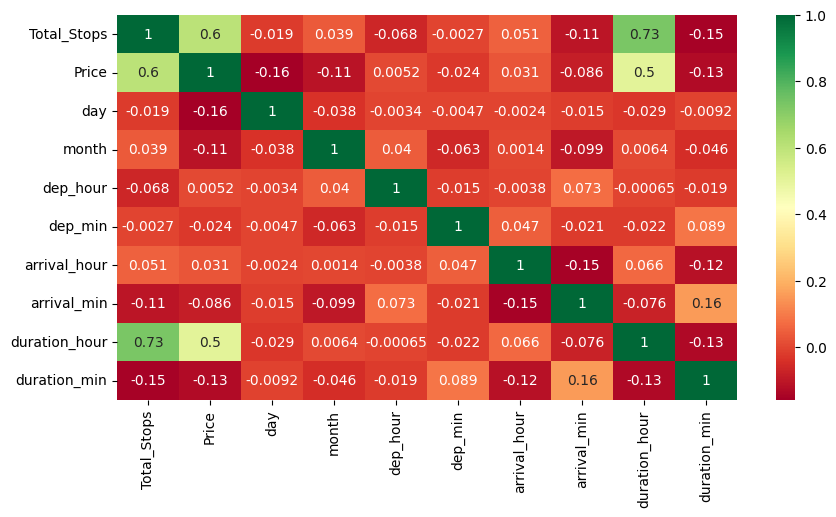

In [21]:
# Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")